In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [2]:
import os

os.chdir("D:/Manal/phd_ppr_manal/paper_figures/number_of_case_per_model")

In [3]:
#importing data

df_env = pd.read_csv("number of cases per experiment_enveloppe_2m.csv")

df_bin = pd.read_csv("number of cases per experiment_binomial_2m_v2.csv")


In [4]:
df_env.head()

,experiment,duration,N,positives,y_pred1,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,...,y_pred991,y_pred992,y_pred993,y_pred994,y_pred995,y_pred996,y_pred997,y_pred998,y_pred999,y_pred1000
0,1,1h,6,0,2,1,3,2,0,1,...,2,0,1,1,0,3,1,0,0,2
1,1,6h,6,0,6,3,2,4,2,2,...,2,6,4,4,6,5,1,5,3,6
2,1,24h,6,0,5,4,4,5,4,4,...,5,5,5,6,4,4,5,5,3,3
3,2,24h,6,1,2,0,2,3,2,2,...,1,3,2,4,3,2,2,2,2,1
4,2,44h,6,4,6,6,6,6,5,6,...,6,6,6,6,6,6,6,6,4,6


In [5]:
df_bin.head()

,experiment,duration,N,obs,sd,CI_2.5,CI_25,Median,CI_75,CI_97.5,Mean
0,1,1,6,0,0.000000,0,0,0,0,1,0.0798
1,1,6,6,0,0.000000,0,0,0,1,2,0.4752
2,1,24,6,0,0.000000,0,1,2,2,4,1.7010
3,2,24,6,1,2.236068,0,1,2,2,4,1.7140
4,2,44,6,4,2.828427,0,2,3,4,5,2.6826


In [6]:
combined_column = df_env['experiment'].astype(str) + "_" + df_env['duration'].astype(str)

In [7]:
df_env.insert(0, 'Exp', combined_column)

# Drop the original columns
df_env.drop(['experiment', 'duration'], axis=1, inplace=True)

In [8]:
df_bin.insert(0, 'Exp', combined_column)

# Drop the original columns
df_bin.drop(['experiment', 'duration'], axis=1, inplace=True)

In [9]:
datacal = df_env[["Exp", "N", "positives"]]  
datacal.columns = ["Exp", "N", "obs"]
datacal.loc[:, 'sd'] = np.sqrt(datacal['obs'] * (datacal['N'] - datacal['obs']))
datacal.head()

C:\Users\U117-T408\AppData\Local\Temp\ipykernel_20680\6142012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datacal.loc[:, 'sd'] = np.sqrt(datacal['obs'] * (datacal['N'] - datacal['obs']))


,Exp,N,obs,sd
0,1_1h,6,0,0.000000
1,1_6h,6,0,0.000000
2,1_24h,6,0,0.000000
3,2_24h,6,1,2.236068
4,2_44h,6,4,2.828427


In [10]:
y_pred_columns = [col for col in df_env.columns if 'y_pred' in col]
df_env['Mean'] = df_env[y_pred_columns].mean(axis=1)

In [11]:
y_pred_data = df_env[y_pred_columns].values

# Calculer les quantiles pour chaque ligne
quantiles = np.quantile(y_pred_data, q=[0.025, 0.25, 0.5, 0.75, 0.975], axis=1).astype(float)

# Ajouter les quantiles comme nouvelles colonnes dans le DataFrame
quantile_labels = ['CI_2.5', 'CI_25', 'Median', 'CI_75', 'CI_97.5']
for i, label in enumerate(quantile_labels):
    df_env[label] = quantiles[i]

In [12]:
df_env.drop(y_pred_columns, axis=1, inplace=True)


In [13]:
df_env.head()
res = df_env

In [14]:
df_env.head()

,Exp,N,positives,Mean,CI_2.5,CI_25,Median,CI_75,CI_97.5
0,1_1h,6,0,1.199,0.0,0.0,1.0,2.0,3.0
1,1_6h,6,0,3.455,1.0,3.0,3.0,4.0,6.0
2,1_24h,6,0,4.576,3.0,4.0,5.0,5.0,6.0
3,2_24h,6,1,2.200,0.0,1.0,2.0,3.0,5.0
4,2_44h,6,4,5.560,4.0,5.0,6.0,6.0,6.0


In [15]:
df_bin.head()

,Exp,N,obs,sd,CI_2.5,CI_25,Median,CI_75,CI_97.5,Mean
0,1_1h,6,0,0.000000,0,0,0,0,1,0.0798
1,1_6h,6,0,0.000000,0,0,0,1,2,0.4752
2,1_24h,6,0,0.000000,0,1,2,2,4,1.7010
3,2_24h,6,1,2.236068,0,1,2,2,4,1.7140
4,2_44h,6,4,2.828427,0,2,3,4,5,2.6826


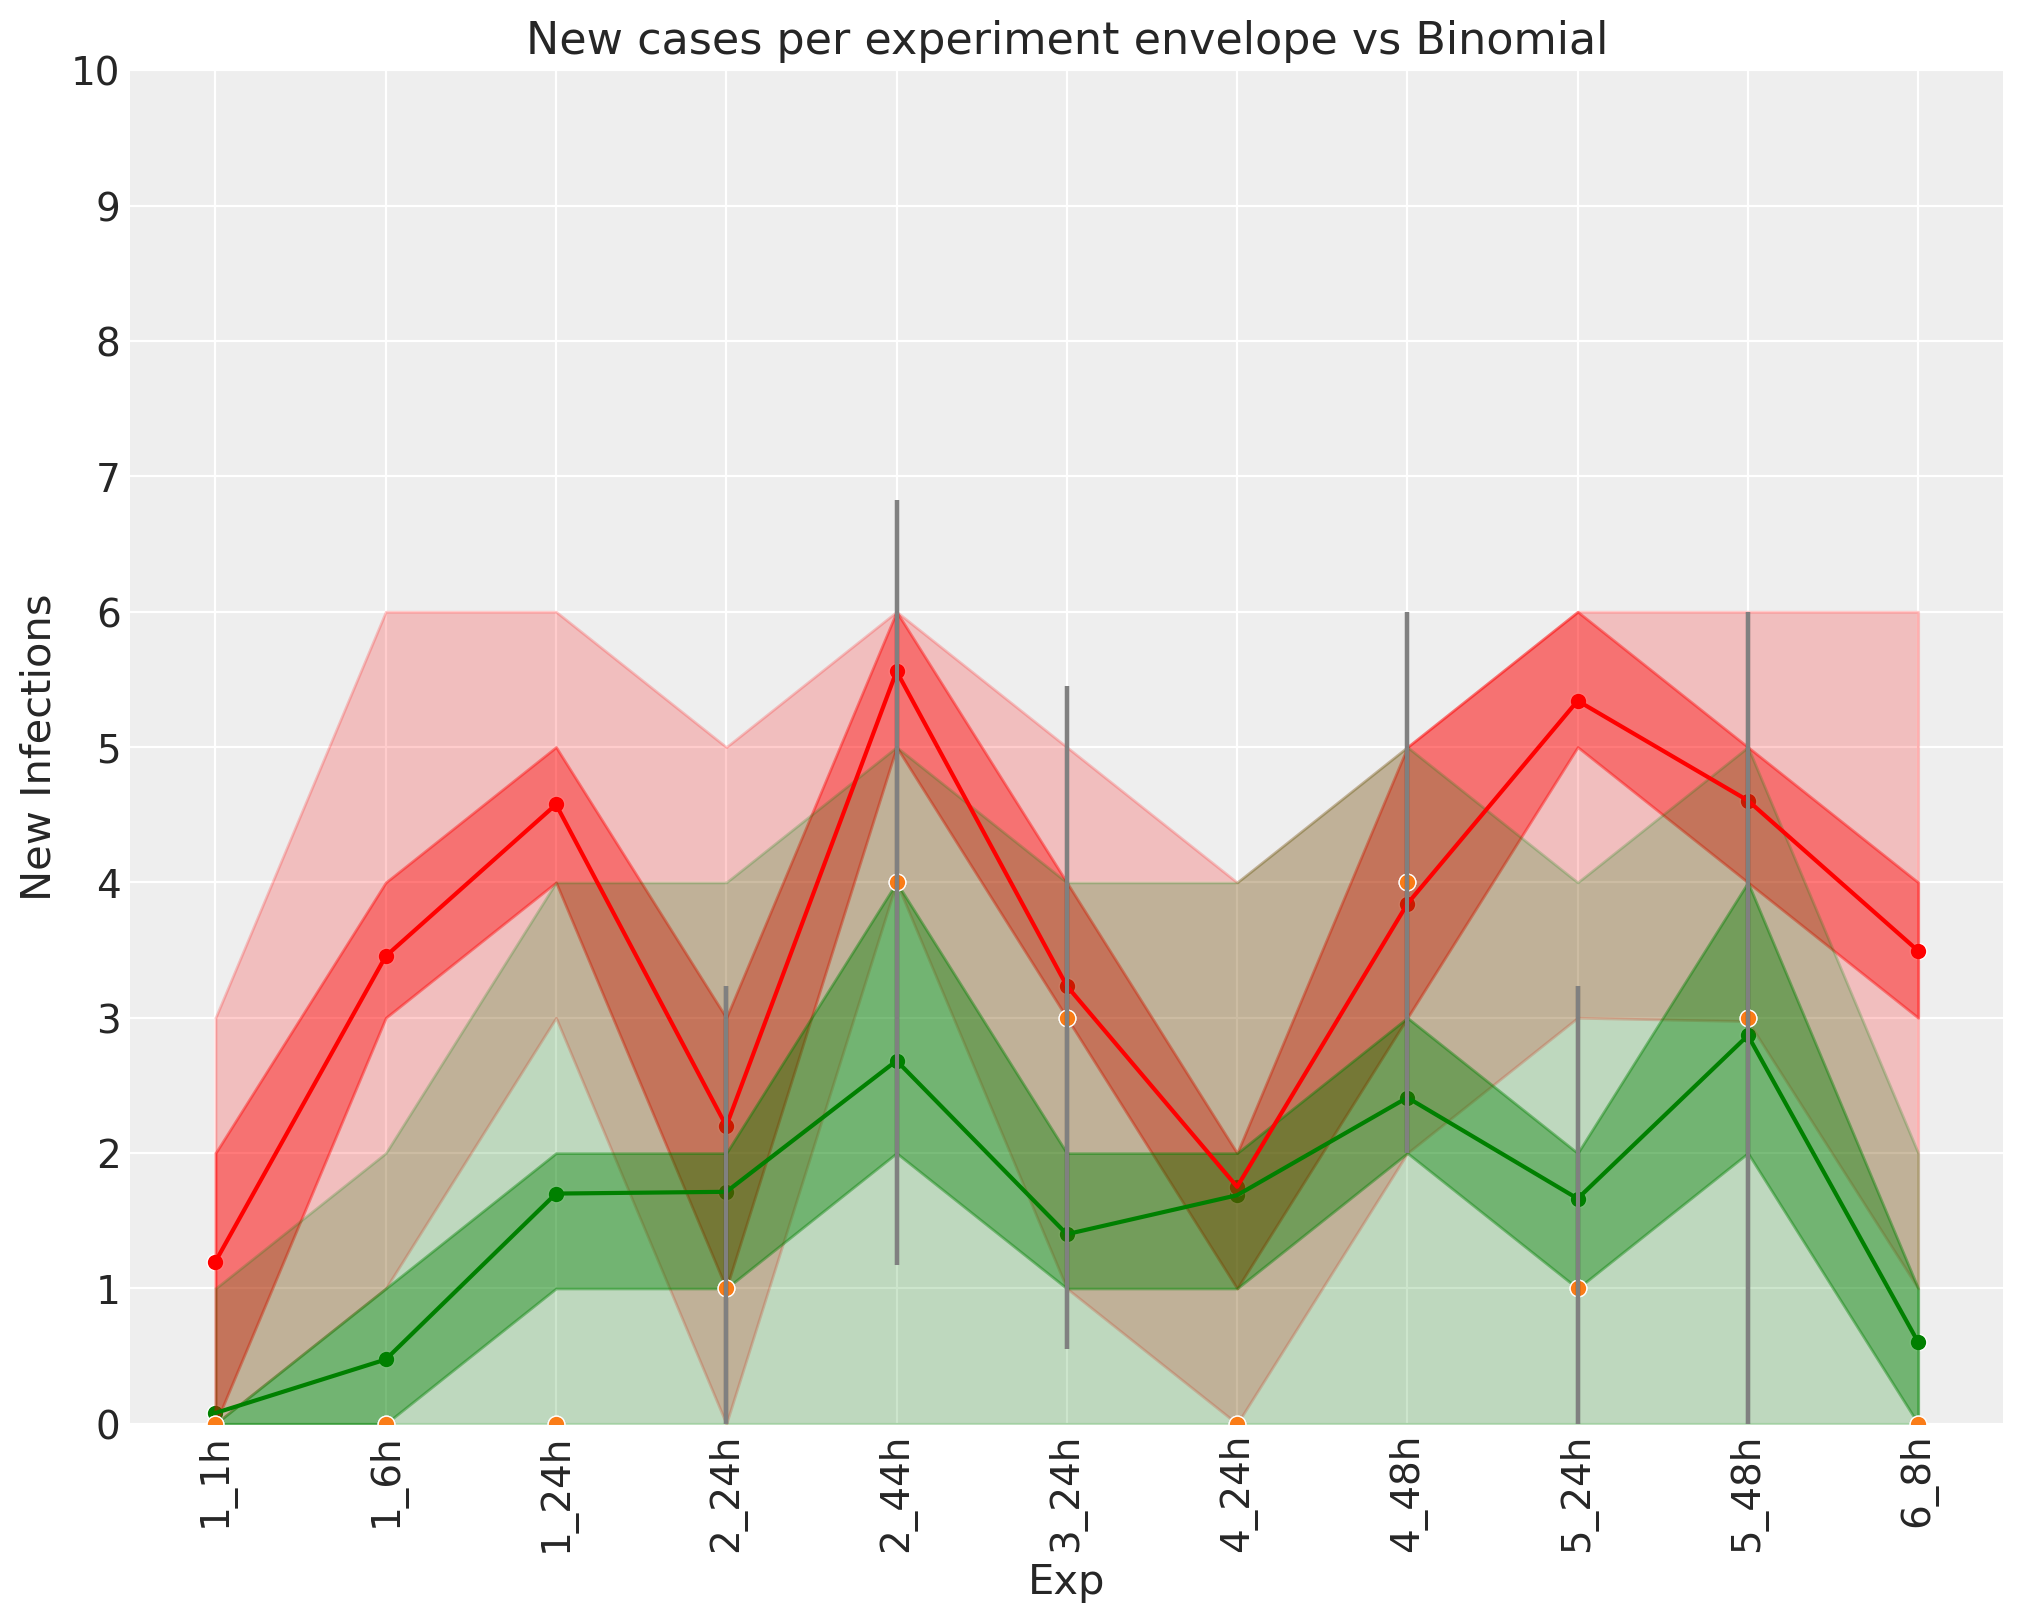

In [16]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='green')
sns.lineplot(data=res, x='Exp', y='Mean', color='red')

sns.scatterplot(data=df_bin, x='Exp', y='Mean', color='green')
sns.scatterplot(data=res, x='Exp', y='Mean', color='red')

# Adding confidence intervals (ribbons)
plt.fill_between(res['Exp'], res['CI_2.5'], res['CI_97.5'], color='red', alpha=0.2)
plt.fill_between(res['Exp'], res['CI_25'], res['CI_75'], color='red', alpha=0.4)


plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='green', alpha=0.2)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='green', alpha=0.4)

# Adding points and error bars from 'datacal'
sns.scatterplot(data=datacal, x='Exp', y='obs')
sns.scatterplot(data=df_bin, x='Exp', y='obs')

plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')
plt.errorbar(df_bin['Exp'], df_bin['obs'], yerr=df_bin['sd'], fmt='none', ecolor='gray')

# Setting labels and title
plt.title("New cases per experiment envelope vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend([],[], frameon=False)

plt.show()